# Basic variables in terms of solar or earth masses

In [56]:
import scipy as sp
import numpy as np
import pandas as pd
import astropy as ap
M_star = 0.145
R_star = 0.178
M_planet = 16.792
print("Mass of the star: " + str(M_star))
print("Radius of the star: " + str(R_star))
print("Mass of the planet: " + str(M_planet))

Mass of the star: 0.145
Radius of the star: 0.178
Mass of the planet: 16.792


# Create a graph of the transits

<Axes: title={'center': 'Light Curve of the Transiting Exoplanet'}, xlabel='Time (days)', ylabel='Normalized Flux (%)'>

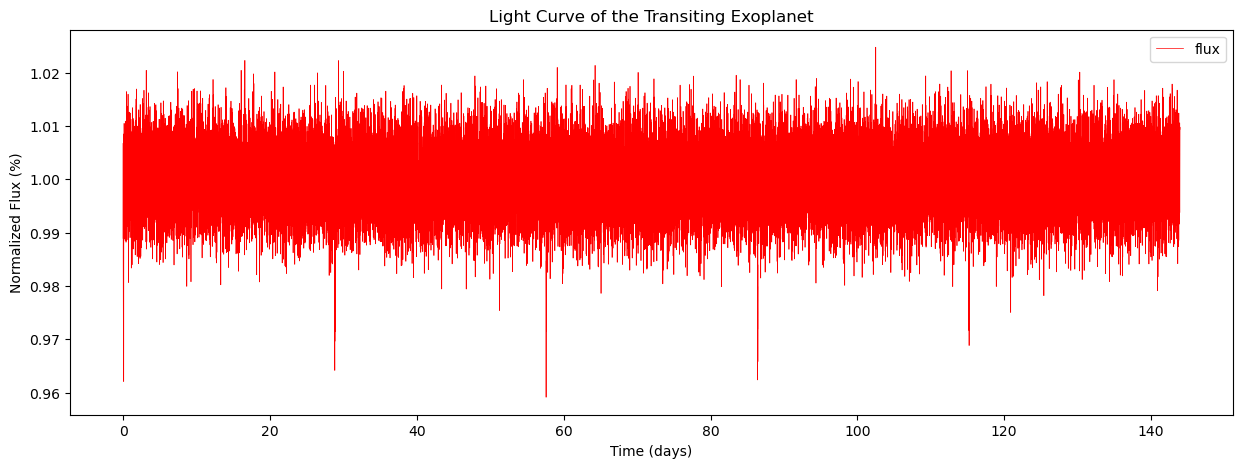

In [57]:
#read in the data from student_022.txt
data = pd.read_csv('student_022.txt', sep = '\s+', header = None)
data.columns = ['time', 'flux']
#convert the time to days
data['time'] = data['time']/86400
data.plot(x = 'time', y = 'flux', kind = 'line', xlabel = 'Time (days)', ylabel = 'Normalized Flux (%)', figsize = (15, 5), color='red', linewidth=0.5, title = 'Light Curve of the Transiting Exoplanet')